In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

/home/gleb/Documents/Programming/master_degree/.master/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [5]:
# размер выборки
sample_volume = 80
# обучающая выборка
x = torch.rand((sample_volume,1)) * 2.5 - 1
y_true = torch.sin(3*x)/2.5 + 0.5
y = y_true + torch.normal(0, 0.05, size=(sample_volume,1))

(torch.Size([80, 1]), torch.Size([80, 1]), torch.Size([80, 1]))

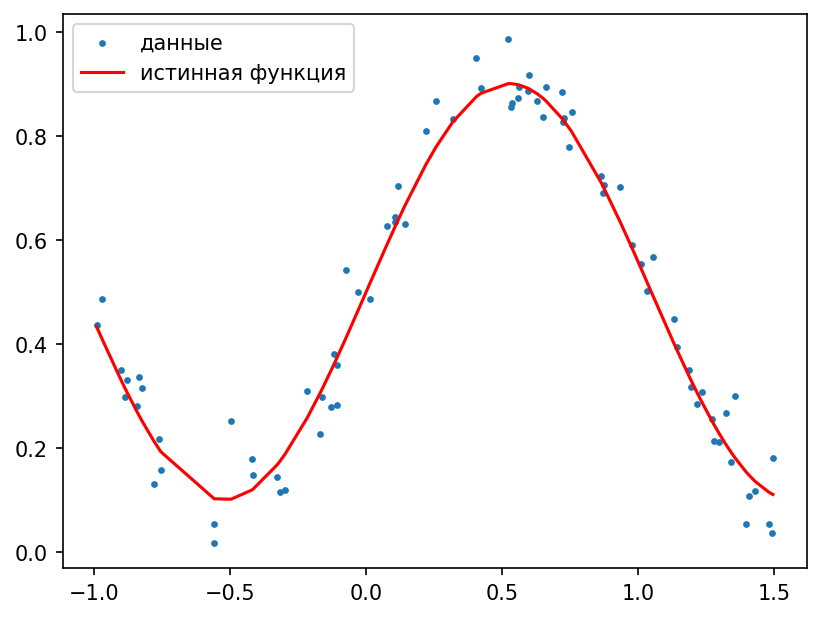

In [19]:
fig, ax = plt.subplots(dpi=150)
ax.scatter(x, y, s=5, label = 'данные')
sorted_x = torch.sort(x, axis=0)
ax.plot(sorted_x.values, y_true[sorted_x.indices.flatten()], color='red', label = 'истинная функция')
ax.legend()
plt.show()

In [25]:
batch_size = None
data = DataLoader(list(zip(x,y)), batch_size=batch_size, shuffle=True)

for x_batch, y_batch in data:
    print(x_batch.shape, y_batch.shape)
    break
    

torch.Size([1]) torch.Size([1])


In [27]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [39]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.stack = nn.Sequential(
            nn.Linear(1, 3),
            nn.ReLU(),
            nn.Linear(3, 2),
            nn.ReLU(),
            nn.Linear(2, 1)
        )

    def forward(self, x):
        return self.stack(x)
    
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (stack): Sequential(
    (0): Linear(in_features=1, out_features=3, bias=True)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=2, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2, out_features=1, bias=True)
  )
)


In [40]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
epochs = 500

In [41]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


In [42]:
for t in range(epochs):
    train(data, model, loss_fn, optimizer)
print("Done!")

Done!


In [43]:
with torch.no_grad():
    x = x.to(device)
    pred = model(x)

pred[:5]

tensor([[0.3632],
        [0.2444],
        [0.3205],
        [0.4508],
        [0.2708]])

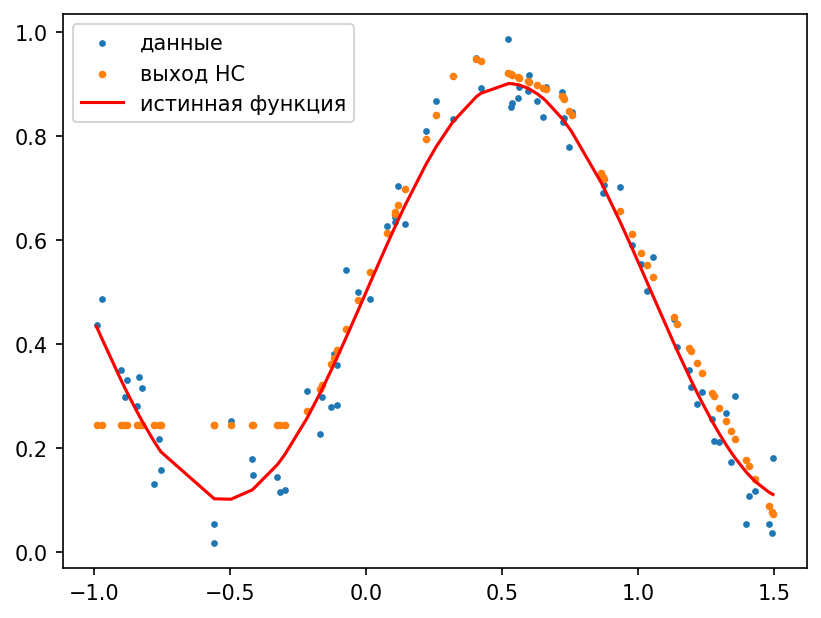

In [44]:
fig, ax = plt.subplots(dpi=150)
ax.scatter(x, y, s=5, label = 'данные')
sorted_x = torch.sort(x, axis=0)
plt.scatter(x, pred, s=7, label = 'выход НС')
ax.plot(sorted_x.values, y_true[sorted_x.indices.flatten()], color='red', label = 'истинная функция')
ax.legend()
plt.show()